#Objective:- The aim of the project is to create an effective and reliable machine learning model that can predict car prices using key features such as the car's name, manufacturer, year of manufacture, kilometers driven, and fuel type. This model will provide accurate price estimates to assist in car valuation and decision-making processes.


In [1]:
#import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read Dataset
df = pd.read_excel("/content/quikr_car.xlsx")


In [3]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,"45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
df.shape

(892, 6)

In [5]:
df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [7]:
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [8]:
df['name'].unique()

array(['Hyundai Santro Xing XO eRLX Euro III', 'Mahindra Jeep CL550 MDI',
       'Maruti Suzuki Alto 800 Vxi',
       'Hyundai Grand i10 Magna 1.2 Kappa VTVT',
       'Ford EcoSport Titanium 1.5L TDCi', 'Ford Figo', 'Hyundai Eon',
       'Ford EcoSport Ambiente 1.5L TDCi',
       'Maruti Suzuki Alto K10 VXi AMT', 'Skoda Fabia Classic 1.2 MPI',
       'Maruti Suzuki Stingray VXi', 'Hyundai Elite i20 Magna 1.2',
       'Mahindra Scorpio SLE BS IV', 'Audi A8', 'Audi Q7',
       'Mahindra Scorpio S10', 'Maruti Suzuki Alto 800',
       'Hyundai i20 Sportz 1.2', 'Maruti Suzuki Alto 800 Lx',
       'Maruti Suzuki Vitara Brezza ZDi', 'Maruti Suzuki Alto LX',
       'Mahindra Bolero DI', 'Maruti Suzuki Swift Dzire ZDi',
       'Mahindra Scorpio S10 4WD', 'Maruti Suzuki Swift Vdi BSIII',
       'Maruti Suzuki Wagon R VXi BS III',
       'Maruti Suzuki Wagon R VXi Minor',
       'Toyota Innova 2.0 G 8 STR BS IV', 'Renault Lodgy 85 PS RXL',
       'Skoda Yeti Ambition 2.0 TDI CR 4x2',
       'Maru

In [9]:
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat',
       'Commercial', 'MARUTI', 'Force', 'Mercedes', 'Land', 'Yamaha',
       'selling', 'URJENT', 'Swift', 'Used', 'Jaguar', 'Jeep', 'tata',
       'Sale', 'very', 'Volvo', 'i', 2012, 'Well', 'all', 7, 9, 'scratch',
       'urgent', 'sell', 'TATA', 'Any', 'Tara'], dtype=object)

In [10]:
df['year'].unique()

array([2007, 2006, 2018, 2014, 2015, 2012, 2013, 2016, 2010, 2017, 2008,
       2011, 2019, 2009, 2005, 2000, '...', '150k', 'TOUR', 2003, 'r 15',
       2004, 'Zest', '/-Rs', 'sale', 1995, 'ara)', 2002, 'SELL', 2001,
       'tion', 'odel', '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi',
       'car', 'able', 'no.', 'd...', 'SALE', 'digo', 'sell', 'd Ex',
       'n...', 'e...', 'D...', ', Ac', 'go .', 'k...', 'o c4', 'zire',
       'cent', 'Sumo', 'cab', 't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [11]:
df['Price'].unique()

array([80000, '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', 75000, '1,00,000', '2,90,000',
       95000, '1,80,000', '3,85,000', '1,05,000', '6,50,000', '6,89,999',
       '4,48,000', '5,49,000', '5,01,000', '4,89,999', '2,80,000',
       '3,49,999', '2,84,999', '3,45,000', '4,99,999', '2,35,000',
       '2,49,999', '14,75,000', '3,95,000', '2,20,000', '1,70,000', 85000,
       '2,00,000', '5,70,000', '1,10,000', '4,48,999', '18,91,111',
       '1,59,500', '3,44,999', '4,49,999', '8,65,000', '6,99,000',
       '3,75,000', '2,24,999', '12,00,000', '1,95,000', '3,51,000',
       '2,40,000', 90000, '1,55,000', '6,00,000', '1,89,500', '2,10,000',
       '3,90,000', '1,35,000', '16,00,000', '7,01,000', '2,65,000',
       '5,25,000', '3,72,000', '6,35,000', '5,50,000', '4,85,000',
       '3,29,500', '2,51,111'

In [12]:
df['kms_driven'].unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [13]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

#Cleaning the Dataset

In [14]:
#Split each string in the 'name' column
df['name'].str.split()

#Slice the first three elements from the resulting lists
df['name'].str.split().str.slice(0,3)

#Join these sliced elements back into a single string
df['name'].str.split().str.slice(0,3).str.join(" ")

#Assign the modified strings back to the 'name' column
df['name'] = df['name'].str.split().str.slice(0,3).str.join(" ")



In [15]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,"45,000 kms",Petrol
1,Mahindra Jeep CL550,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium,Ford,2014,"5,75,000","36,000 kms",Diesel


In [16]:
#check dataType of column
df['year'].dtype

#convert "Year" column into str format
df['year'] = df['year'].astype(str)

# Filter DataFrame to only include rows where 'year' column contains numeric values
df = df[df['year'].str.isnumeric()]

#convert year column into "int" format
df['year']=df['year'].astype(int)

#unique value in "year"
df['year'].unique()

<ipython-input-16-c2a191870590>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year']=df['year'].astype(int)


array([2007, 2006, 2018, 2014, 2015, 2012, 2013, 2016, 2010, 2017, 2008,
       2011, 2019, 2009, 2005, 2000, 2003, 2004, 1995, 2002, 2001])

In [17]:
df['Price'].unique()

array([80000, '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', 75000, '1,00,000', '2,90,000',
       95000, '1,80,000', '3,85,000', '1,05,000', '6,50,000', '6,89,999',
       '4,48,000', '5,49,000', '5,01,000', '4,89,999', '2,80,000',
       '3,49,999', '2,84,999', '3,45,000', '4,99,999', '2,35,000',
       '2,49,999', '14,75,000', '3,95,000', '2,20,000', '1,70,000', 85000,
       '2,00,000', '5,70,000', '1,10,000', '4,48,999', '18,91,111',
       '1,59,500', '3,44,999', '4,49,999', '8,65,000', '6,99,000',
       '3,75,000', '2,24,999', '12,00,000', '1,95,000', '3,51,000',
       '2,40,000', 90000, '1,55,000', '6,00,000', '1,89,500', '2,10,000',
       '3,90,000', '1,35,000', '16,00,000', '7,01,000', '2,65,000',
       '5,25,000', '3,72,000', '6,35,000', '5,50,000', '4,85,000',
       '3,29,500', '2,51,111'

In [18]:
# Remove rows where 'Price' is 'Ask For Price'
df = df[df['Price'] != 'Ask For Price']

# Remove commas from 'Price'
df['Price'] =df['Price'].str.replace(",", "")

# Drop rows with NaN values in 'Price'
df = df.dropna(subset=['Price'])

# Convert 'Price' to integers
df['Price'] = df['Price'].astype(int)

<ipython-input-18-708d52834a73>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] =df['Price'].str.replace(",", "")


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 733 entries, 1 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        733 non-null    object
 1   company     733 non-null    object
 2   year        733 non-null    int64 
 3   Price       733 non-null    int64 
 4   kms_driven  733 non-null    object
 5   fuel_type   730 non-null    object
dtypes: int64(2), object(4)
memory usage: 40.1+ KB


In [20]:
# Extract the first part of the 'kms_driven' column, remove commas, and store as string
df['kms_driven'] = df['kms_driven'].str.split().str.get(0).str.replace("," , "")

# Filter rows where 'kms_driven' contains only numeric values
df = df[df['kms_driven'].str.isnumeric()]

# Convert 'kms_driven' to integers
df['kms_driven'] = df['kms_driven'].astype(int)

In [21]:
# remove nan value from "Fule_type"
df = df[~df['fuel_type'].isnull()]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 1 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        730 non-null    object
 1   company     730 non-null    object
 2   year        730 non-null    int64 
 3   Price       730 non-null    int64 
 4   kms_driven  730 non-null    int64 
 5   fuel_type   730 non-null    object
dtypes: int64(3), object(3)
memory usage: 39.9+ KB


In [23]:
df.to_csv("cleaned_data.csv")

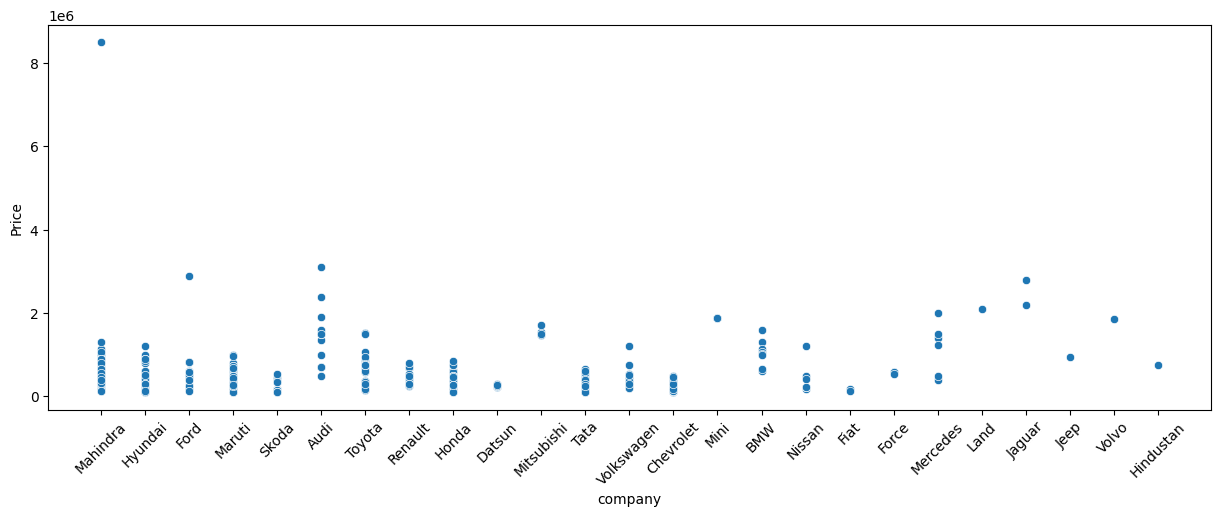

In [24]:
# Set the figure size
plt.figure(figsize=(15, 5))

# Create the scatter plot
sns.scatterplot(x='company', y='Price', data=df)

plt.xticks(rotation=45)

# Show the plot
plt.show()

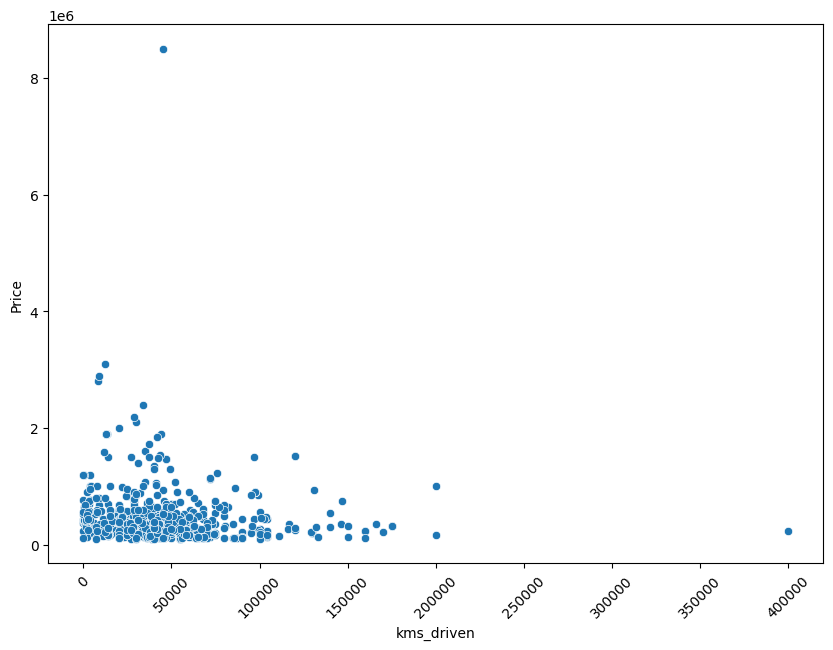

In [25]:
# Set the figure size
plt.figure(figsize=(10, 7))

# Create the scatter plot
sns.scatterplot(y='Price',x='kms_driven', data=df)

plt.xticks(rotation=45)

# Show the plot
plt.show()

# encode the categorical column


In [26]:
encoded_df = pd.get_dummies(df,columns=['name', 'company', 'fuel_type'])

# Convert boolean columns to integer
encoded_df = encoded_df.astype(int)

# Display the transformed DataFrame
print(encoded_df.head())

   year   Price  kms_driven  name_Audi A3 Cabriolet  name_Audi A4 1.8  \
1  2006  425000          40                       0                 0   
3  2014  325000       28000                       0                 0   
4  2014  575000       36000                       0                 0   
6  2012  175000       41000                       0                 0   
7  2013  190000       25000                       0                 0   

   name_Audi A4 2.0  name_Audi A6 2.0  name_Audi A8  name_Audi Q3 2.0  \
1                 0                 0             0                 0   
3                 0                 0             0                 0   
4                 0                 0             0                 0   
6                 0                 0             0                 0   
7                 0                 0             0                 0   

   name_Audi Q5 2.0  ...  company_Nissan  company_Renault  company_Skoda  \
1                 0  ...               0      

##Splitting data into independent and dependent variables

In [27]:
X = encoded_df.drop(columns=['Price'])
y = encoded_df['Price']

In [28]:
#Independent variables
X.head()

,year,kms_driven,name_Audi A3 Cabriolet,name_Audi A4 1.8,name_Audi A4 2.0,name_Audi A6 2.0,name_Audi A8,name_Audi Q3 2.0,name_Audi Q5 2.0,name_Audi Q7,...,company_Nissan,company_Renault,company_Skoda,company_Tata,company_Toyota,company_Volkswagen,company_Volvo,fuel_type_Diesel,fuel_type_LPG,fuel_type_Petrol
1,2006,40,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2014,28000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2014,36000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,2012,41000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,2013,25000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
# Dependent variables
y.head()

1    425000
3    325000
4    575000
6    175000
7    190000
Name: Price, dtype: int64

#spliting the dataset into train and test dataset

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [31]:
print( X_train.shape, X_test.shape)

(584, 265) (146, 265)


In [32]:
print( y_train.shape, y_test.shape)

(584,) (146,)


#Implementing the Linear Regression Model

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [34]:
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Predict on the test data
y_pred_linear = linear_model.predict(X_test)

# Calculate evaluation metrics
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Print the results
print(f'Linear Regression MAE: {mae_linear}')
print(f'Linear Regression MSE: {mse_linear}')
print(f'Linear Regression R² score: {r2_linear}')

Linear Regression MAE: 108481.73930265714
Linear Regression MSE: 47262947906.874756
Linear Regression R² score: 0.5601644135444013


#implementing the Ridge Regression Model Model

In [35]:
from sklearn.linear_model import Ridge

# Initialize the Ridge model
ridge_model = Ridge(alpha=1.0)

# Fit the model on the training data
ridge_model.fit(X_train, y_train)

# Predict on the test data
y_pred_ridge = ridge_model.predict(X_test)

# Calculate evaluation metrics
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print the results
print(f'Ridge Regression MAE: {mae_ridge}')
print(f'Ridge Regression MSE: {mse_ridge}')
print(f'Ridge Regression R² score: {r2_ridge}')


Ridge Regression MAE: 126994.31838767567
Ridge Regression MSE: 51749422938.97635
Ridge Regression R² score: 0.5184126510273669


In [36]:
from sklearn.linear_model import Lasso

# Initialize the Lasso model
lasso_model = Lasso(alpha=1.0)

# Fit the model on the training data
lasso_model.fit(X_train, y_train)

# Predict on the test data
y_pred_lasso = lasso_model.predict(X_test)

# Calculate evaluation metrics
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print the results
print(f'Lasso Regression MAE: {mae_lasso}')
print(f'Lasso Regression MSE: {mse_lasso}')
print(f'Lasso Regression R² score: {r2_lasso}')


Lasso Regression MAE: 114214.6082887722
Lasso Regression MSE: 59098821082.42715
Lasso Regression R² score: 0.45001812665513297


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.306e+13, tolerance: 1.568e+10
  model = cd_fast.enet_coordinate_descent(


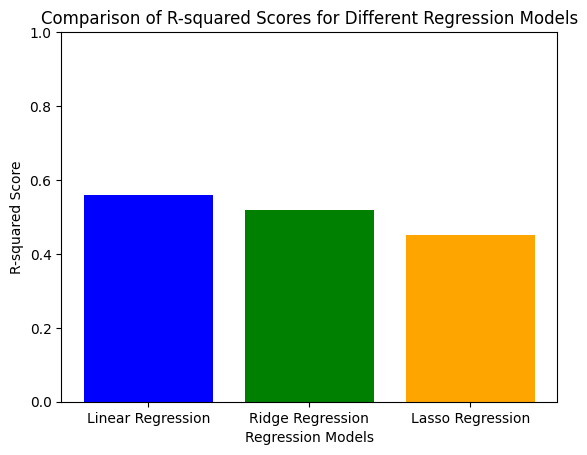

In [37]:
# Create a bar chart of R-squared scores
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
r2_scores = [r2_linear, r2_ridge, r2_lasso]

plt.bar(models, r2_scores, color=['blue', 'green', 'orange'])
plt.xlabel('Regression Models')
plt.ylabel('R-squared Score')
plt.title('Comparison of R-squared Scores for Different Regression Models')
plt.ylim(0, 1)
plt.show()

After evaluating and comparing the performance of three regression models (Linear Regression, Ridge Regression, and Lasso Regression) on our dataset, we have decided to choose the Linear Regression model. This decision is based on the fact that the Linear Regression model exhibited the highest R-squared score among the three models, indicating the best overall fit to the data. Therefore, we believe that the Linear Regression model provides the most accurate predictions for our dataset and is the most suitable choice for our analysis
